In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Question 1

## a

In [2]:
q1_df = pd.read_csv('iris.data',names=['sepal_l','sepal_w','petal_l','petal_w','class'])
q1_df

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
q1_df.shape

(150, 5)

In [4]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
q1_df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
q1_df.loc[:, q1_df.isnull().any()].columns

Index([], dtype='object')

In [7]:
q1_df = q1_df.replace({'class': {'Iris-virginica': 2, 'Iris-versicolor': 1, 'Iris-setosa':0}})

In [8]:
from sklearn.model_selection import train_test_split
X = q1_df.iloc[:, :-1]
Y = q1_df.iloc[:, -1]
# X_train,X_test,Y_train,Y_test = train_test_split(X, Y,train_size=0.7,random_state=21)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,train_size=0.7,stratify=Y)

In [9]:
Y_train.value_counts()

1    35
0    35
2    35
Name: class, dtype: int64

In [10]:
Y_test.value_counts()

2    15
1    15
0    15
Name: class, dtype: int64

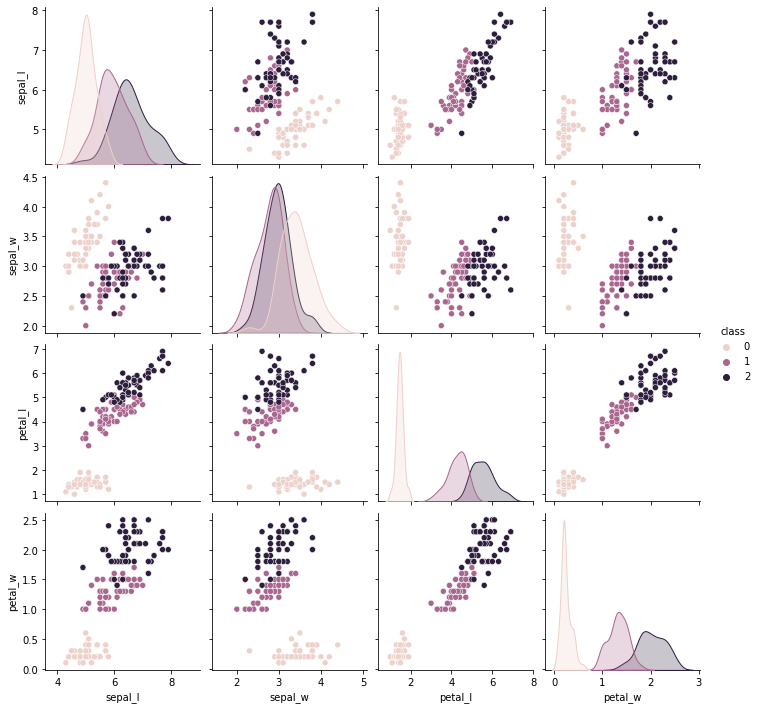

In [11]:
sns.pairplot(q1_df,hue='class')

In [12]:
# for i in q1_df.columns[:-1]:
#   X_N, Y_N = X_train[i].to_numpy(),Y_train.to_numpy()
#   # print(X_N,Y_N)
#   plt.scatter(X_N[Y_N==0][:,0], X_N[Y_N=='Iris-versicolor'][:,-1], c='b', label='0')
#   plt.scatter(X_N[Y_N==1][:,0], X_N[Y_N=='Iris-virginica'][:,-1], c='r', label='0')
#   plt.show()

In [13]:
X_num = X.to_numpy()
Y_num = Y.to_numpy()
print(X_num.shape,Y_num.shape)

(150, 4) (150,)


In [14]:
Y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

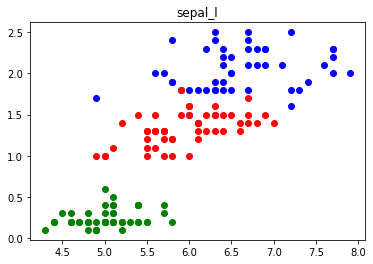

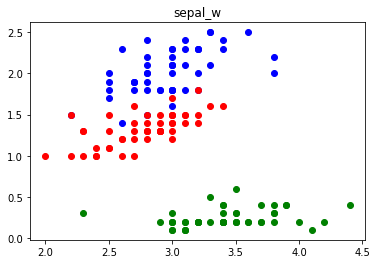

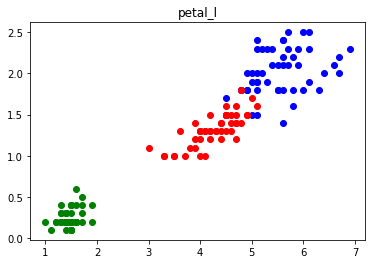

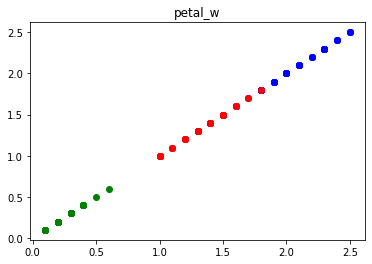

In [15]:
for i in range(len(q1_df.columns[:-1])):
  plt.scatter(X_num[Y_num==2][:,i], X_num[Y_num==2][:,-1], c='b', label='0')
  plt.scatter(X_num[Y_num==1][:,i], X_num[Y_num==1][:,-1], c='r', label='0')
  plt.scatter(X_num[Y_num==0][:,i], X_num[Y_num==0][:,-1], c='g', label='0')
  plt.title(q1_df.columns[i])
  plt.show()

## b to e

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, accuracy_score
from scipy import linalg

In [17]:
# for i in range(len(q1_df.columns[:-1])):
#   for j in range(i+1,len(q1_df.columns[:-1])):
#     X_train1 = X_train[[X_train.columns[i],X_train.columns[j]]]
#     X_test1 = X_test[[X_test.columns[i],X_test.columns[j]]]
#     # print(X_train1)
#     qda = QuadraticDiscriminantAnalysis()
#     model = qda.fit(X_train1, Y_train)
#     # print('Priors',model.priors_)
#     # print('Means',model.means_)
#     pred=model.predict(X_test1)
#     print(X_train.columns[i],X_train.columns[j],accuracy_score(Y_test,pred))

In [18]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

petal_w sepal_l
Error : 4.444444444444439 %

MEAN         petal_w   sepal_l
class                    
0      0.262857  5.042857
1      1.314286  5.920000
2      2.031429  6.671429

COVARIANCE                 petal_w   sepal_l
class                            
0     petal_w  0.013580  0.007815
      sepal_l  0.007815  0.117227
1     petal_w  0.035966  0.046765
      sepal_l  0.046765  0.264588
2     petal_w  0.081630  0.067689
      sepal_l  0.067689  0.417395

petal_w sepal_w
Error : 6.666666666666665 %

MEAN         petal_w   sepal_w
class                    
0      0.262857  3.437143
1      1.314286  2.757143
2      2.031429  3.025714

COVARIANCE                 petal_w   sepal_w
class                            
0     petal_w  0.013580  0.007303
      sepal_w  0.007303  0.145345
1     petal_w  0.035966  0.035042
      sepal_w  0.035042  0.100168
2     petal_w  0.081630  0.058580
      sepal_w  0.058580  0.121378

petal_w petal_l
Error : 2.2222222222222254 %

MEAN         petal_w   p

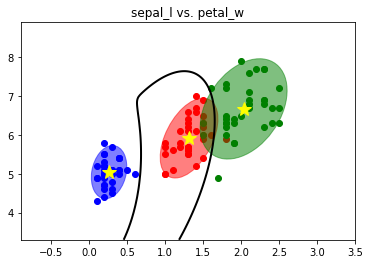

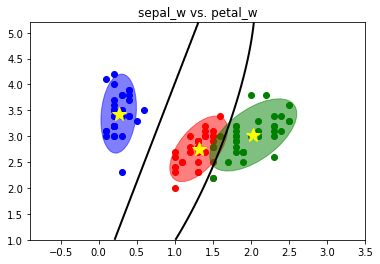

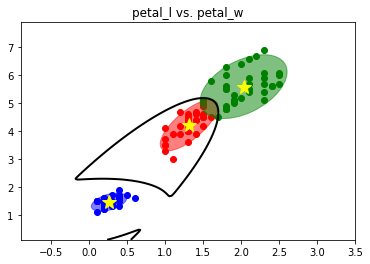

In [19]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
for i in range(len(q1_df.columns[:-2])):
  X_train1 = X_train[['petal_w',X_train.columns[i]]]
  X_test1 = X_test[['petal_w',X_test.columns[i]]]
  X_train1_num = X_train1.to_numpy()
  X_test1_num = X_test1.to_numpy()
  Y_train_num = Y_train.to_numpy()
  Y_test_num = Y_test.to_numpy()
  # print(X_train1)
  model = qda.fit(X_train1, Y_train)
  # print('Priors',model.priors_)
  # print('Means',model.means_)
  pred = model.predict(X_test1)
  print('petal_w',X_train.columns[i])
  print('Error :',(1-accuracy_score(Y_test,pred))*100,"%")
  print()
  print('MEAN',X_train1.groupby(by=Y_train).mean())
  print()
  print('COVARIANCE',X_train1.groupby(by=Y_train).cov())
  print()
  # plotting
  splot = plt.figure()
  splot = plt.subplot(1, 1, 1)

  splot.scatter(X_train1_num[Y_train_num==0][:,0], X_train1_num[Y_train_num==0][:,1], c='b', label='0')
  splot.scatter(X_train1_num[Y_train_num==1][:,0], X_train1_num[Y_train_num==1][:,1], c='r', label='0')
  splot.scatter(X_train1_num[Y_train_num==2][:,0], X_train1_num[Y_train_num==2][:,1], c='g', label='0')

  plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
  plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'r')
  plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'g')

  xx, yy = np.meshgrid(np.linspace(min(X_train1_num[:,0])-1, max(X_train1_num[:,0])+1, 200), np.linspace(min(X_train1_num[:,1])-1, max(X_train1_num[:,1])+1, 200))
  X_grid = np.c_[xx.ravel(), yy.ravel()]
  probabilities_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)
  splot.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
  plt.title(str(q1_df.columns[i] + ' vs. petal_w'))


## f to h

In [20]:
best_cols = ['petal_w', 'petal_l']

In [21]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
X_train2 = X_train[best_cols]
X_test2 = X_test[best_cols]
X_train2_num = X_train2.to_numpy()
X_test2_num = X_test2.to_numpy()
model = lda.fit(X_train2, Y_train)

Error : 6.666666666666665 %


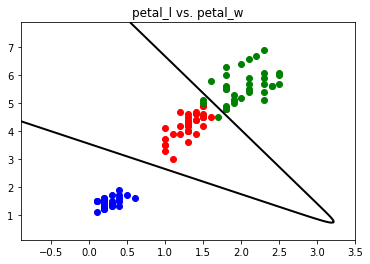

In [22]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(X_train2_num[Y_train_num==0][:,0], X_train2_num[Y_train_num==0][:,1], c='b', label='0')
splot.scatter(X_train2_num[Y_train_num==1][:,0], X_train2_num[Y_train_num==1][:,1], c='r', label='0')
splot.scatter(X_train2_num[Y_train_num==2][:,0], X_train2_num[Y_train_num==2][:,1], c='g', label='0')

xx, yy = np.meshgrid(np.linspace(min(X_train2_num[:,0])-1, max(X_train2_num[:,0])+1, 200), np.linspace(min(X_train2_num[:,1])-1, max(X_train2_num[:,1])+1, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
splot.contour(xx, yy, probabilities_lda, [0.5], linewidths=2., colors='k')
plt.title(str(q1_df.columns[i] + ' vs. petal_w'))
pred2 = model.predict(X_test2)
print('Error :',(1-accuracy_score(Y_test,pred2))*100,"%")

In [23]:
print('Error for QDA :',(1-accuracy_score(Y_test,pred))*100,"%")
print('Error for LDA :',(1-accuracy_score(Y_test,pred2))*100,"%")

Error for QDA : 2.2222222222222254 %
Error for LDA : 6.666666666666665 %


## i

In [24]:
X_num = X.to_numpy()
Y_num = Y.to_numpy()

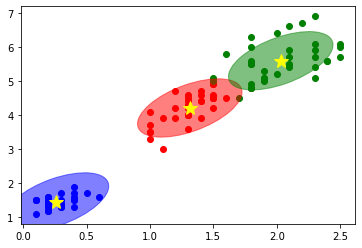

In [25]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(X_train2_num[Y_train_num==0][:,0], X_train2_num[Y_train_num==0][:,1], c='b', label='0')
splot.scatter(X_train2_num[Y_train_num==1][:,0], X_train2_num[Y_train_num==1][:,1], c='r', label='0')
splot.scatter(X_train2_num[Y_train_num==2][:,0], X_train2_num[Y_train_num==2][:,1], c='g', label='0')

plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
plot_ellipse(splot, lda.means_[2], lda.covariance_, 'g')

# Q2

## pre-processing

In [26]:
q2_df = pd.read_csv('iris.data',names=['sepal_l','sepal_w','petal_l','petal_w','class'])
q2_df

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
q2_df = q2_df.replace({'class': {'Iris-virginica': 2, 'Iris-versicolor': 1, 'Iris-setosa':0}})
q2_df = q2_df.drop(['sepal_l','sepal_w'],axis=1)
q2_df

,petal_l,petal_w,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


## a

In [28]:
q2_df_means = q2_df.groupby(by=q2_df[q2_df.columns[-1]]).mean().to_numpy()
q2_df.groupby(by=q2_df[q2_df.columns[-1]]).mean()

,petal_l,petal_w
class,,
0,1.464,0.244
1,4.260,1.326
2,5.552,2.026


In [29]:
q2_df_cov = q2_df.groupby(by=q2_df[q2_df.columns[-1]]).cov()
q2_df.groupby(by=q2_df[q2_df.columns[-1]]).cov()

petal_l   petal_w
class                            
0     petal_l  0.030106  0.005698
      petal_w  0.005698  0.011494
1     petal_l  0.220816  0.073102
      petal_w  0.073102  0.039106
2     petal_l  0.304588  0.048824
      petal_w  0.048824  0.075433

In [30]:
X = q2_df.iloc[:, :-1]
Y = q2_df.iloc[:, -1]
X_num = X.to_numpy()
Y_num = Y.to_numpy()

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size=0.7, random_state=1,stratify=Y)

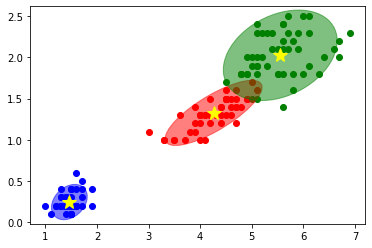

In [32]:
splot1 = plt.figure()
splot1 = plt.subplot(1, 1, 1)

splot1.scatter(X_num[Y_num==0][:,0], X_num[Y_num==0][:,1], c='b', label='0')
splot1.scatter(X_num[Y_num==1][:,0], X_num[Y_num==1][:,1], c='r', label='0')
splot1.scatter(X_num[Y_num==2][:,0], X_num[Y_num==2][:,1], c='g', label='0')

plot_ellipse(splot1, q2_df_means[0], q2_df_cov.values[0:2], 'b')
plot_ellipse(splot1, q2_df_means[1], q2_df_cov.values[2:4], 'r')
plot_ellipse(splot1, q2_df_means[2], q2_df_cov.values[4:6], 'g')

## b

In [33]:
def fit(x,y):
  mean = x.groupby(by=y).mean()
  covariance = x.groupby(by=y).cov()
  return mean, covariance

mean_train,covar_train = fit(X,Y)
print("Mean",mean_train)
print()
print("Co-Variance",covar_train)

Mean        petal_l  petal_w
class                  
0        1.464    0.244
1        4.260    1.326
2        5.552    2.026

Co-Variance                 petal_l   petal_w
class                            
0     petal_l  0.030106  0.005698
      petal_w  0.005698  0.011494
1     petal_l  0.220816  0.073102
      petal_w  0.073102  0.039106
2     petal_l  0.304588  0.048824
      petal_w  0.048824  0.075433


In [34]:
m = np.array(mean_train)
v = np.array(covar_train)
v = np.vsplit(v,3)
print(m)
print(v)

[[1.464 0.244]
 [4.26  1.326]
 [5.552 2.026]]
[array([[0.03010612, 0.00569796],
       [0.00569796, 0.01149388]]), array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]]), array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])]


In [35]:
def multi_gauss(row, mean, co_var):
  row = row.reshape(1,2)
  mean = mean.reshape(1,2)
  # print("rm",row,mean)
  # print("hi",row.shape,mean.shape,co_var.shape)
  # print("hi",len(mean),row,mean,co_var)
  pi = np.pi
  e = np.e
  k = 1/(pow((2*pi),2/2) * np.sqrt(np.linalg.det(co_var)))
  k1 = (row-mean)@np.linalg.inv(co_var)@np.matrix.transpose(row-mean)
  # k1 = np.matrix(row-mean) * np.matrix(np.linalg.inv(co_var)) * np.matrix(np.matrix.transpose(row-mean))
  exp = np.exp(-k1/2)
  p = k*exp
  # print("p",p)
  # print(p[0][0])
  return p[0][0]

In [63]:
def compute_likelihood(row_x,m,v):
  # n_uniq = np.unique(Y)
  prob = []
  for i in range(3):
    m1 = m[i]
    v1 = v[i]
    # print("v",v[i])
    # print("row_x",row_x)
    p = multi_gauss(row_x,m1,v1)
    # mat1 = np.matrix(row_x-m1).reshape(2,1)
    # print("mat1",row_x,m1,mat1)
    # mat2 = np.transpose(mat1)
    # print("ll",v1)
    # print("ll1",mat2, mat1)
    prob.append(p)
  # arr = np.vsplit(np.array(prob), len(n_uniq))
  # val = arr[row_y]
  # likelihood = val[0]*val[1]
  # # print(likelihood)
  # return (likelihood).tolist()[0]
  return prob

q2_likelihood = []
for i in range(len(X)):
  q2_likelihood.append(compute_likelihood(np.array(X.iloc[i,:]),m,v))

# q2_likelihood

## c

In [37]:
mean_train1,var_train1 = fit(X_train,Y_train)
print("Mean",mean_train1)
print()
print("Variance",var_train1)

Mean         petal_l   petal_w
class                    
0      1.457143  0.240000
1      4.274286  1.322857
2      5.637143  2.025714

Variance                 petal_l   petal_w
class                            
0     petal_l  0.038403  0.006471
      petal_w  0.006471  0.008353
1     petal_l  0.210202  0.074429
      petal_w  0.074429  0.042992
2     petal_l  0.323580  0.058429
      petal_w  0.058429  0.085496


In [38]:
m_train = np.array(mean_train1)
v_train = np.array(var_train1)
v_train = np.vsplit(v_train,3)
print(m_train)
print(v_train)

[[1.45714286 0.24      ]
 [4.27428571 1.32285714]
 [5.63714286 2.02571429]]
[array([[0.03840336, 0.00647059],
       [0.00647059, 0.00835294]]), array([[0.21020168, 0.07442857],
       [0.07442857, 0.0429916 ]]), array([[0.32357983, 0.05842857],
       [0.05842857, 0.0854958 ]])]


In [62]:
q2_likelihood_train = []
for i in range(len(X_train)):
  q2_likelihood_train.append(compute_likelihood(np.array(X_train.iloc[i,:]),m_train,v_train))

# q2_likelihood_train

In [40]:
# Parameters
mean_train1

,petal_l,petal_w
class,,
0,1.457143,0.240000
1,4.274286,1.322857
2,5.637143,2.025714


In [41]:
var_train1

petal_l   petal_w
class                            
0     petal_l  0.038403  0.006471
      petal_w  0.006471  0.008353
1     petal_l  0.210202  0.074429
      petal_w  0.074429  0.042992
2     petal_l  0.323580  0.058429
      petal_w  0.058429  0.085496

##d

In [42]:
X_train_num = X_train.to_numpy()
Y_train_num = Y_train.to_numpy()

In [43]:
var_train = X_train.groupby(by=Y_train).cov()
var_train

petal_l   petal_w
class                            
0     petal_l  0.038403  0.006471
      petal_w  0.006471  0.008353
1     petal_l  0.210202  0.074429
      petal_w  0.074429  0.042992
2     petal_l  0.323580  0.058429
      petal_w  0.058429  0.085496

[[0.03840336 0.00647059]
 [0.00647059 0.00835294]
 [0.21020168 0.07442857]
 [0.07442857 0.0429916 ]
 [0.32357983 0.05842857]
 [0.05842857 0.0854958 ]]


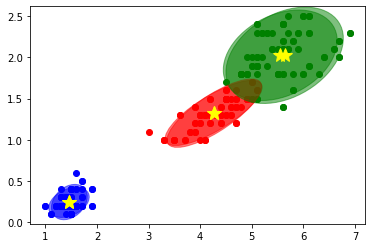

In [44]:
splot1 = plt.figure()
splot1 = plt.subplot(1, 1, 1)

splot1.scatter(X_num[Y_num==0][:,0], X_num[Y_num==0][:,1], c='b', label='0')
splot1.scatter(X_num[Y_num==1][:,0], X_num[Y_num==1][:,1], c='r', label='0')
splot1.scatter(X_num[Y_num==2][:,0], X_num[Y_num==2][:,1], c='g', label='0')

splot1.scatter(X_train_num[Y_train_num==0][:,0], X_train_num[Y_train_num==0][:,1], c='b', label='0')
splot1.scatter(X_train_num[Y_train_num==1][:,0], X_train_num[Y_train_num==1][:,1], c='r', label='0')
splot1.scatter(X_train_num[Y_train_num==2][:,0], X_train_num[Y_train_num==2][:,1], c='g', label='0')

plot_ellipse(splot1, q2_df_means[0], q2_df_cov.values[0:2], 'b')
plot_ellipse(splot1, q2_df_means[1], q2_df_cov.values[2:4], 'r')
plot_ellipse(splot1, q2_df_means[2], q2_df_cov.values[4:6], 'g')

mean_train1 = np.array(mean_train1)
print(var_train1.values)

plot_ellipse(splot1, mean_train1[0], var_train.values[0:2], 'b')
plot_ellipse(splot1, mean_train1[1], var_train.values[2:4], 'r')
plot_ellipse(splot1, mean_train1[2], var_train.values[4:6], 'g')

## e

In [45]:
def prior(k):
  prior = 1/3
  final_probabilities = []
  for i in k:
    class_prob = np.prod(i) * prior
    final_probabilities.append(class_prob)
  return final_probabilities

In [46]:
def predict(row):
  # n_uniq = np.unique(Y)
  # prob = []
  # for i in range(len(n_uniq)):
  #   class_split = mean_var_split[i]
  #   for j in range(len(class_split)):
  #     m = class_split[j][0]
  #     v = class_split[j][1]
  #     feature_val = row[j]
  p = compute_likelihood(row,m_train,v_train)
  #     prob.append([p])
  # arr = np.vsplit(np.array(prob), len(n_uniq))
  final_prob = prior(p)
  max_prob = max(final_prob)
  pred = final_prob.index(max_prob)

  # q2_likelihood_train = []
  # for i in range(len(X_train)):
  #   q2_likelihood_train.append(compute_likelihood(np.array(X_train.iloc[i,:]),m_train,v_train))

  # q2_likelihood_train
  return pred

In [47]:
fit(X_train,Y_train)
X_test_arr = np.array(X_test)
Y_pred = []
for i in X_test_arr:
  # print(i)
  Y_pred.append(predict(i))

print(Y_pred)

[2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0]


In [66]:
def accuracy(pred,actual):
  right,wrong = 0,0
  for i in range(len(pred)):
    if(pred[i]==actual[i]):
      right+=1
    else:
      wrong+=1
  return (right*100)/(right+wrong)

print("Accuracy :",accuracy(Y_pred,np.array(Y_test)))

Accuracy : 97.77777777777777


# Question 3

## data

In [51]:
q3_train = pd.read_csv('train.data', header=None, sep=' ',names=['docId', 'termId', 'count'])
q3_train

,docId,termId,count
0,1,1,4.0
1,1,2,2.0
2,1,3,10.0
3,1,4,4.0
4,1,5,2.0
...,...,...,...
101080,729,1196,1.0
101081,729,1197,1.0
101082,729,1352,1.0
101083,729,1388,1.0


In [52]:
q3_train['termId'].nunique()

14226

In [53]:
q3_train_label = pd.read_csv('train.label',header=None)
q3_train_label

,0
0,1
1,1
2,1
3,1
4,1
...,...
11264,20
11265,20
11266,20
11267,20


In [54]:
q3_test = pd.read_csv('test.data',header=None,sep=' ',names=['docId', 'termId', 'count'])
q3_test

,docId,termId,count
0,1,3,1
1,1,10,1
2,1,12,8
3,1,17,1
4,1,23,8
...,...,...,...
99721,712,10034,1
99722,712,10267,1
99723,712,10268,6
99724,712,10332,1


In [55]:
q3_test_label = pd.read_csv('test.label',header=None)
q3_test_label

,0
0,1
1,1
2,1
3,1
4,1
...,...
7500,20
7501,20
7502,20
7503,20


In [56]:
# q3 = pd.read_csv('train.map',sep=' ',header=None)
# q3

In [57]:
q3_train.describe

<bound method NDFrame.describe of         docId  termId  count
0           1       1    4.0
1           1       2    2.0
2           1       3   10.0
3           1       4    4.0
4           1       5    2.0
...       ...     ...    ...
101080    729    1196    1.0
101081    729    1197    1.0
101082    729    1352    1.0
101083    729    1388    1.0
101084    729      14    NaN

[101085 rows x 3 columns]>

In [58]:
# dict = {}
# # q3_train['docId'].value_counts()
# q3_train_label_num = np.array(q3_train_label)
# # q3_train_label_num[0][0]
# q3_train['label'] = 0
# for i in range(len(q3_train)):
#   q3_train['label'][i] = q3_train_label_num[q3_train['docId']-1][0]

In [59]:
q3_train['docId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [60]:
label = []
q3_train_label_num = np.array(q3_train_label)
for i in q3_train['docId']:
  label.append(q3_train_label_num[i-1][0])

q3_train['label'] = label

In [61]:
q3_train

,docId,termId,count,label
0,1,1,4.0,1
1,1,2,2.0,1
2,1,3,10.0,1
3,1,4,4.0,1
4,1,5,2.0,1
...,...,...,...,...
101080,729,1196,1.0,2
101081,729,1197,1.0,2
101082,729,1352,1.0,2
101083,729,1388,1.0,2


## a

In [ ]:
label_groups = (q3_train.groupby(by=q3_train['label']))
label_groups

In [ ]:
termId_groups = []
termId_groups.append(0)
for i in range(1,21):
  temp = label_groups.get_group(i)
  termId_groups.append(temp.groupby(by=temp['termId']))

In [ ]:
count_labels = []
for i in range(1,21):
  # count_labels.append(label_groups.get_group(i).shape[0])
  count_labels.append(sum(label_groups.get_group(i)['count']))

print(count_labels)
# print(sum(count_labels)==sum(q3_train['count']))

[148812, 110358, 90767, 99146, 86190, 152846, 61094, 114102, 102631, 107898, 141267, 200456, 103173, 155338, 153714, 201267, 175914, 254805, 186426, 119096]


In [ ]:
# count_labels1 = []
# for i in range(label_groups.get_group(i).shape[1]):
#   count_labels1.append(label_groups.get_group(i).shape[0])

# print(count_labels1)

In [ ]:
termId_groups[1].get_group(5)

,docId,termId,count,label
4,1,5,2,1
4094,29,5,1,1
5644,39,5,2,1
6159,44,5,2,1
6860,47,5,3,1
8078,48,5,1,1
8435,51,5,1,1
8716,53,5,4,1
9463,56,5,1,1
12474,75,5,1,1


In [ ]:
ll = np.zeros((20,61188))
ll

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(20):
  for j in range(61188):
    try :
      ll[i][j] = (sum(termId_groups[i+1].get_group(j+1)['count'])) / count_labels[i]
    except:
      pass

In [ ]:
ll

array([[8.73585464e-05, 4.23352955e-04, 1.84796925e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.43685098e-04, 5.34623679e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21189419e-04, 7.60188174e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.92456977e-05, 6.04383744e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.09198288e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.77846443e-04, 7.55692886e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## b

In [ ]:
ll1 = np.zeros((20,61188))

In [ ]:
for i in range(20):
  for j in range(61188):
    ll1[i][j] = ((ll[i][j])*count_labels[i] + 1) / (20*1 + count_labels[i])

In [ ]:
ll1

array([[9.40657923e-05, 4.30015051e-04, 1.85443991e-03, ...,
        6.71898516e-06, 6.71898516e-06, 6.71898516e-06],
       [5.52646361e-04, 5.43586584e-04, 9.05977640e-06, ...,
        9.05977640e-06, 9.05977640e-06, 9.05977640e-06],
       [1.32177514e-04, 7.71035501e-04, 1.10147929e-05, ...,
        1.10147929e-05, 1.10147929e-05, 1.10147929e-05],
       ...,
       [4.31668792e-05, 6.08260571e-04, 3.92426175e-06, ...,
        3.92426175e-06, 3.92426175e-06, 3.92426175e-06],
       [5.36348326e-06, 2.14539330e-04, 5.36348326e-06, ...,
        5.36348326e-06, 5.36348326e-06, 5.36348326e-06],
       [8.39517781e-06, 3.86178179e-04, 8.39517781e-05, ...,
        8.39517781e-06, 8.39517781e-06, 8.39517781e-06]])

In [ ]:
np.count_nonzero(ll1==0)

0

## c

In [ ]:
q3_test

,docId,termId,count
0,1,3,1
1,1,10,1
2,1,12,8
3,1,17,1
4,1,23,8
...,...,...,...
967869,7505,44515,1
967870,7505,47720,1
967871,7505,50324,1
967872,7505,59935,1


In [ ]:
prior_prob = []
label_groups_y = (q3_train_label.groupby(by=q3_train_label[0]))

for i in range(1,21):
  # print(label_groups_y.get_group(i).shape[0],q3_train_label.shape[0])
  prior_prob.append(label_groups_y.get_group(i).shape[0]/q3_train_label.shape[0])

prior_prob

[0.04259472890229834,
 0.05155736977549028,
 0.05075871860857219,
 0.05208980388676901,
 0.051024935664211554,
 0.052533498979501284,
 0.051646108794036735,
 0.052533498979501284,
 0.052888455053687104,
 0.0527109770165942,
 0.05306593309078002,
 0.0527109770165942,
 0.05244475996095483,
 0.0527109770165942,
 0.052622237998047744,
 0.05315467210932647,
 0.04836276510781791,
 0.05004880646020055,
 0.04117490460555506,
 0.033365870973467035]

In [ ]:
q3_test.head()

,docId,termId,count
0,1,3,1
1,1,10,1
2,1,12,8
3,1,17,1
4,1,23,8


In [ ]:
test_group = (q3_test.groupby(by=q3_test['docId']))

y_pred = []
# for i in range(1,len(test_group)+1):
for k in range(1,len(test_group)+1):
  pd_temp = test_group.get_group(k)
  class_prob = []
  for i in range(1,21):
    p = 0
    for j in range(pd_temp.shape[0]):
      p += np.log( ll1[i-1][pd_temp.iloc[j,1]-1]*pd_temp.iloc[j,2]*prior_prob[i-1] )
    class_prob.append(p)
  y_pred.append(class_prob.index(max(class_prob))+1)

len(y_pred)

7505

In [ ]:
print(y_pred)

[1, 1, 1, 16, 1, 1, 1, 1, 9, 1, 1, 16, 1, 16, 16, 16, 16, 1, 16, 1, 16, 8, 1, 1, 1, 1, 1, 1, 16, 20, 16, 9, 16, 18, 1, 1, 1, 16, 16, 16, 1, 1, 16, 1, 1, 1, 14, 14, 14, 13, 16, 1, 16, 1, 18, 16, 2, 16, 8, 1, 1, 1, 1, 1, 9, 16, 9, 16, 13, 16, 16, 16, 16, 14, 1, 12, 16, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 16, 1, 1, 14, 1, 9, 16, 9, 1, 1, 1, 9, 16, 16, 16, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 9, 1, 1, 1, 1, 1, 16, 16, 9, 1, 14, 9, 1, 16, 1, 9, 9, 1, 1, 1, 1, 1, 1, 1, 9, 13, 1, 1, 16, 1, 16, 9, 9, 1, 1, 1, 16, 1, 16, 16, 16, 17, 1, 16, 16, 16, 1, 1, 1, 16, 16, 16, 1, 1, 16, 16, 14, 16, 5, 1, 16, 16, 15, 1, 1, 16, 13, 16, 1, 16, 7, 1, 1, 16, 1, 1, 16, 9, 8, 15, 1, 1, 9, 10, 1, 5, 1, 1, 15, 1, 16, 9, 8, 8, 16, 1, 1, 10, 1, 1, 16, 13, 1, 16, 16, 1, 16, 13, 17, 10, 14, 18, 16, 1, 10, 16, 2, 7, 7, 16, 16, 16, 1, 16, 16, 11, 10, 8, 1, 1, 1, 1, 1, 1, 13, 5, 9, 1, 1, 16, 1, 8, 16, 1, 16, 14, 16, 1, 1, 16, 1, 16, 1, 1, 1, 10, 1, 1, 1, 1, 16, 1, 1, 16, 1, 1, 1, 15, 9, 1, 16, 

In [ ]:
def accuracy(pred,actual):
  right,wrong = 0,0
  for i in range(len(pred)):
    if(pred[i]==actual[i]):
      right+=1
    else:
      wrong+=1
  return (right*100)/(right+wrong)

print("Accuracy :",accuracy(y_pred,np.array(q3_test_label)))

Accuracy : 74.84343770819454
